In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Rozkład normalny, bernoliergo, plazona, są rozkłady skrzywione


In [94]:
#generowanie rozkładu normalnego za pomocą modułu np random
#wyznaczam ziarno pseudolosowości
#wyznaczam stałą -ilość próbek

In [95]:
np.random.seed(0)
N=1_000_000

In [96]:
data = np.random.randn(N) #generuje rozklad normalny 
#w podanej ilosci probek, wzgledem wartosci zerowej im wiecej probek tym jest on blizszy tej wartosci

In [97]:
np.mean(data), np.median(data)

(0.0015121465155362318, 0.002387730826572747)

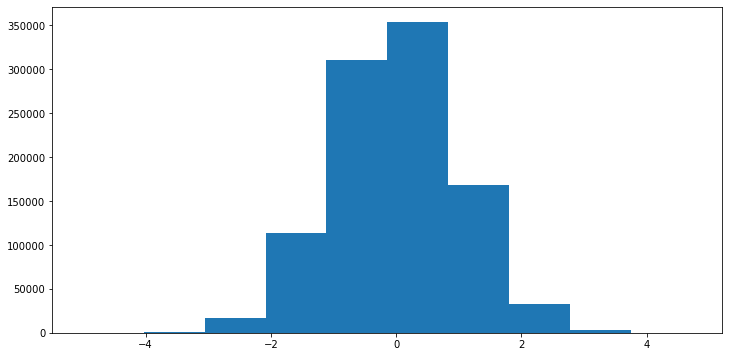

In [98]:
#generuje wykres 
plt.figure(figsize=(12,6))#rozmiar w calach
plt.hist(data)
plt.show()

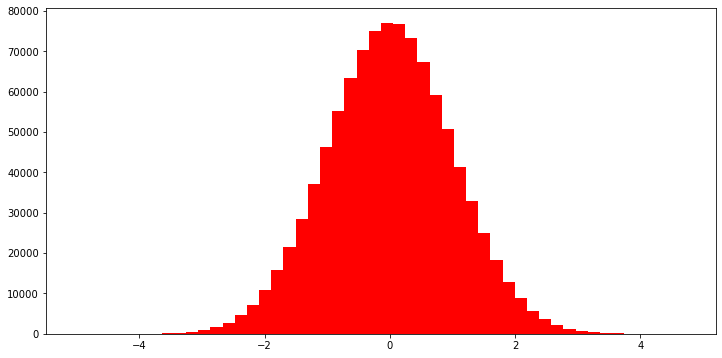

In [99]:
#generuje wykres 
plt.figure(figsize=(12,6))
plt.hist(data, bins=50, color='red')

plt.show()

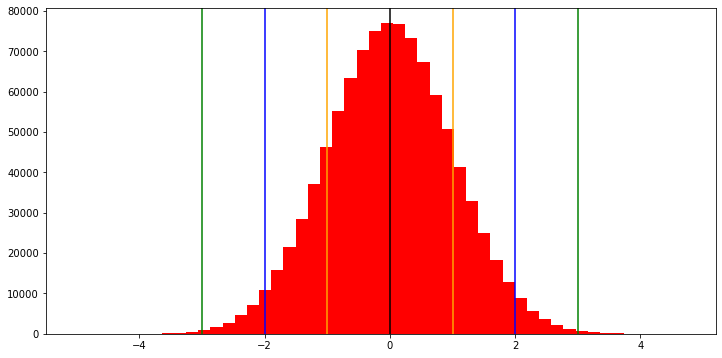

In [100]:
#generuje wykres 
plt.figure(figsize=(12,6))
plt.hist(data, bins=50, color='red')
plt.axvline(np.mean(data),color='black') #dodaje linie pionowa oznaczajaca nasza srednia
plt.axvline(np.mean(data)+np.std(data), color='orange') #dodaje linie pionowa oznaczajaca nasze odchylenie standardowe
plt.axvline(np.mean(data)-np.std(data), color='orange') #dodaje druga pionowa linie oznaczajaca nasze odchylenie standardowe
plt.axvline(np.mean(data)+2*np.std(data), color='blue')
plt.axvline(np.mean(data)-2*np.std(data), color='blue')
plt.axvline(np.mean(data)+3*np.std(data), color='green')
plt.axvline(np.mean(data)-3*np.std(data), color='green')
plt.show()

powyżej mamy przedstawioną regułę trzech sigm. 

In [101]:
_mean = np.mean(data)
_std = np.std(data)

#obliczam liczbe probek w odlesłości 1 odchylenia standardowego od średniej
len(data[(data>=_mean-_std)&(data<=_mean+_std)])/N*100

68.28

In [102]:
#2*std
len(data[(data>=_mean-2*_std)&(data<=_mean+2*_std)])/N*100

95.4563

In [103]:
#3*std
len(data[(data>=_mean-3*_std)&(data<=_mean+3*_std)])/N*100

99.7331

In [104]:
#jak sprawdzić czy coś jest rozkładem normalnym ? -> analiza graficzna, lub testy statystyczne
#poniże test Shapiro-Wilka z biblioteki scipy
import scipy

In [105]:
from scipy.stats import shapiro

In [106]:
shapiro(data)
#wynikiem pracy jest krotka która zwraca wartosc testu drugi element to prawdopodobienstwo testowe
# ktore mowi że obliczona wartosc jest przypadkowa i jest nie zgodna z rzeczywistoscia
#poniższy wynik jest okreslony jako przypadkowy co wynika z tego że u nas N >5000

ShapiroResult(statistic=1.0002193450927734, pvalue=1.0)

In [126]:
np.random.seed(0)
data = np.random.randn(4_500) #generuje rozklad normalny 
shapiro(data)

ShapiroResult(statistic=0.99982750415802, pvalue=0.9872961044311523)

In [127]:
data

array([ 1.76405235,  0.40015721,  0.97873798, ..., -0.09834549,
        0.84987707, -0.49498571])

In [128]:
#podział na porcje danych
#podział na kwartyle (4 czesci)
pd.qcut(data, q=4) #

[(0.644, 3.802], (-0.029, 0.644], (0.644, 3.802], (0.644, 3.802], (0.644, 3.802], ..., (-3.741, -0.704], (-0.029, 0.644], (-0.704, -0.029], (0.644, 3.802], (-0.704, -0.029]]
Length: 4500
Categories (4, interval[float64, right]): [(-3.741, -0.704] < (-0.704, -0.029] < (-0.029, 0.644] < (0.644, 3.802]]

In [131]:
#metody zeby zobaczyc jak wygladaja dane w kwartylach:
#1. konwertujemy tablice do dataframe
df = pd.DataFrame(data)
df.describe() #metoda do opisu kwantyli i ich wartosci

,0
count,4500.000000
mean,-0.023379
std,0.985935
min,-3.740101
25%,-0.704431
50%,-0.028989
75%,0.644114
max,3.801660


In [135]:
#metody zeby zobaczyc jak wygladaja dane w kwartylach:
#1. konwertujemy tablice do dataframe
df = pd.DataFrame(data)
df.describe(percentiles=[x/10 for x in range (1,10)]) #metoda describe służy do opisu wartości kwantyli

,0
count,4500.000000
mean,-0.023379
std,0.985935
min,-3.740101
10%,-1.306522
20%,-0.860651
30%,-0.541455
40%,-0.278432
50%,-0.028989
60%,0.219909


#sprawdzić ->> wykres pudełkowy i  kwartyle ?

<b>kwantyle </b>to porcja danych bazujący na dyskretyzacji - gdzie wartościom ciągłym przypisujemy pewien przedział np. wiek 0-100 może być zapisany jako liczba całkowita może być też 45,5. i Jeżeli chcielibyśmy osobom z zakresu 0-18 przydzielić kategorie dzieci 18-65 to dorośli a od 65 seniorzy to jest to kategoryzacja danych gdzie wartość ciągła wieku jest przez nas podzielona na kategorie wg. ustalonych przez nas kryteriów. Jest to dyskretyzacja. Dyskretyzacja powoduje że ilość liczb/kategorii/grup staje jest policzalna i można je opisać przy użyciu narzędzi statystycznych.

<b>Korelacja</b> to związek miedzy czymś a czymś. W uczeniu maszynowym jest to ważne poniważ pozwala określić reguły transfromacji danych między danymi wejściowymi a danymi wyjściowymi.
Korelacja dotyczy zawsze dwóch zestawów danych, wejściowe i wyścjiowe. Nie muszą być one liniowe czy też jednowymiarowy.
Nasze dane wejściowe będą miały w uczeniu maszynowym kilka wymiarów. 

Korelacja przyjmuje wartosc od -1 do 1. 
- Jezeli wartos 0 - brak korelacji:
- 0.3 - słaba korelacja
- 0.3-0.7 - korelacja jest średnia
- 0.7-1 - korelacja jest silna

In [148]:
np.random.seed(0)
#generuje 5000 próbek
x= np.random.randint(-10,11, 5000) #5000 elemeentów z podanego przedziału
y = 2*x + np.random.randn(5000)*10

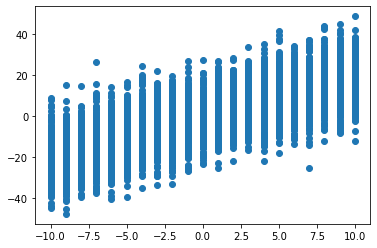

In [149]:
#rysuje wykres rozrzutu wartości pyplot
plt.scatter(x, y)

In [150]:
#sprawdzamy czy wystepuje korelacja
from scipy.stats import pearsonr, spearmanr 
#import dwóch testów statystycznych 

In [151]:
pearsonr(x,y)

(0.7635868855086893, 0.0)

In [152]:
spearmanr(x,y)

SpearmanrResult(correlation=0.7720387637016054, pvalue=0.0)

In [153]:
# w obiektach typu data frame są gotowe metody do obliczenia korelacji.

In [154]:
df = pd.DataFrame({"x":x, "y":y})
df

,x,y
0,2,8.029931
1,5,29.111195
2,-10,-25.759701
3,-7,-21.759662
4,-7,-13.749474
...,...,...
4995,-6,-12.988602
4996,1,5.995345
4997,5,-4.511550
4998,-1,-4.596051


In [156]:
df.corr() # obliczenie korelacji pearsona

,x,y
x,1.000000,0.763587
y,0.763587,1.000000
